# Unemployment Graph for USA economy over 2000-2019 period

Inquiry: Compared to Michigan state and USA in general, how did 2008 crises affect the unemployment rate in Ann Arbor, Michigan?

Three data sets were extracted from the website of the U.S. Bureau of Labor Statistics

1. Michigan Unemployment Rate (Seasonally Adjusted) : https://www.bls.gov/eag/eag.mi.htm

2. Ann Arbor Unemployment Rate (Seasonally Adjusted): https://www.bls.gov/lau/metrossa.htm

3. U.S. Unemployment Rate (Seasonally Adjusted): https://www.bls.gov/eag/eag.us.htm

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read data, extract relevant columns and calculate avg unemployment rates on yearly basis

USA_unemp = pd.read_excel('SeriesReport-20200121040357_5ed38c.xlsx', header=11)
USA_unemp_rate = USA_unemp.set_index('Year').mean(axis=1)

Michigan_unemp = pd.read_excel('SeriesReport-20200121040510_118615.xlsx', header=10)
Michigan_unemp_rate = Michigan_unemp.set_index('Year').mean(axis=1)


Metropolitan_unemp = (pd.read_excel('ssamatab1.xlsx', header=2)
                      .drop(0))
AnnArbor_unemp = (Metropolitan_unemp[Metropolitan_unemp['Area'].
                                     str.contains('Ann Arbor.*')][['Year', 'Month', 'Unemployment Rate']]
                  .reset_index(drop=True))

AnnArbor_unemp.Year = AnnArbor_unemp.Year.astype(int)
AnnArbor_unemp.Month = AnnArbor_unemp.Month.astype(int)

AnnArbor_unemp_rate = (AnnArbor_unemp[AnnArbor_unemp['Year'] >= 2000]
                       .groupby('Year')['Unemployment Rate']
                       .mean())

AnnArbor_unemp.Year = AnnArbor_unemp.Year.astype(int)
AnnArbor_unemp.Month = AnnArbor_unemp.Month.astype(int)

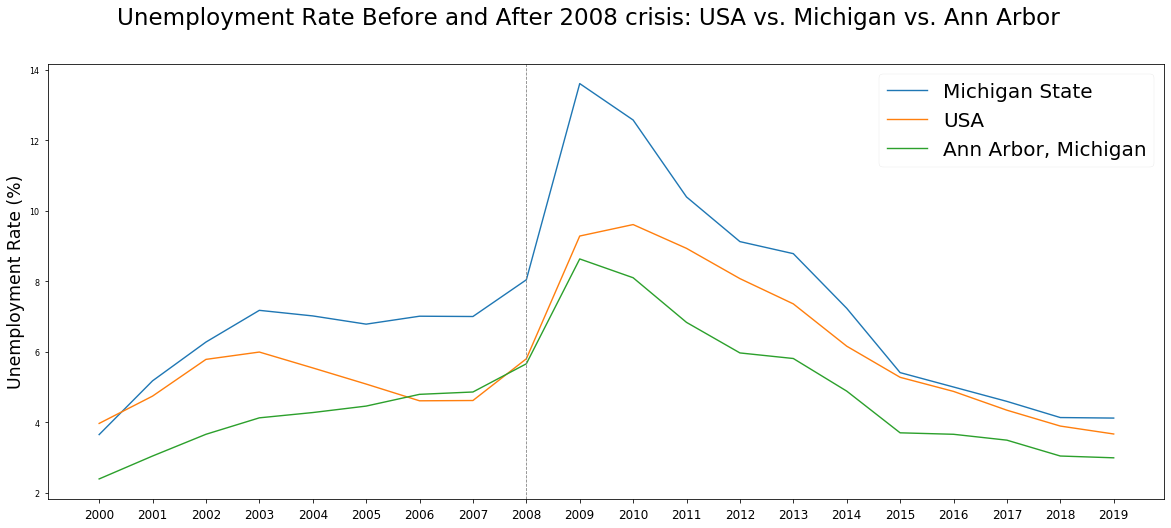

In [4]:
#plot unemployment graph

fig = plt.figure(figsize=(20,8))

plt.style.use('seaborn-paper')

plt.suptitle('Unemployment Rate Before and After 2008 crisis: USA vs. Michigan vs. Ann Arbor', fontsize=23)
plt.plot(Michigan_unemp_rate, label='Michigan State')
plt.plot(USA_unemp_rate, label='USA')
plt.plot(AnnArbor_unemp_rate, label='Ann Arbor, Michigan')

plt.legend(loc='upper right', fontsize=20)
plt.xticks(np.arange(2000, 2020, step=1), fontsize='large')
plt.ylabel('Unemployment Rate (%)', fontsize= 'xx-large');
plt.axvline(x=2008, linewidth=0.8, ls= '--', color='gray');

plt.savefig('Unemployment.png')

# Conclusion

As we can see from the graph, the unemployment rate in USA, Michigan and Ann Arbor had been increasing between 2000 and 2008. And USA economy has been greatly suffered from the 2008 crises in terms of employment statistics.

First of all, the general unemployment trend in Ann Arbor behaves in parallel with USA and Michigan. However, the unemployment rate in Ann Arbor has always been lower, compared to USA and Michigan during 2000-2019. Interestingly, Michigan state has a significantly high unemployment rate and this is also valid immediately after 2008 crisis.

The crisis has tremendously affected U.S. economy, and Ann Arbor and Michigan are no exceptions as well. Nonetheless, we can say Ann Arbor was slightly less affected from the crises, compared to USA in general. Besides, the city has managed to recover well, and reach nearly the level of unemployment rate in 2000. Based on 2019 data, it has still approx. twice lower unemp. rate than USA.

As a result, this may related with the impact of Michigan University on Ann Arbor's economy as many resources address it.

### Notes on Cairo's Data Visualization Principles

**truthfulness:** I particularly pay attention to use seasonally-adjusted data for three regions for truthfulness, since the unemployment rates can be affected from seasonal parameters.

**beauty:** I prefer to use a minimal and simple design/soft colors for beauty.

**functionality** I didn't add xlabel (Years) since its obvious from the x axis.

**insightfulness:** I add a vertical line on 2008 to simplify the graph for the audience and highlight the research question.